In [1]:
#from uatu.watchers import *
from sklearn.model_selection import train_test_split
import h5py

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
f = h5py.File('/home/users/swmclau2/scratch/UatuLightconeTraining/UatuLightcones.hdf5', 'r')
boxno = 0
X = np.array(f['Box%03d'%boxno]["X"])
Y = f['Box%03d'%boxno]['Y']

In [6]:
all_Ys = []
for box in f.keys():
    #print f[box]['Y']
    all_Ys.append(f[box]['Y'][0, :])
    
all_Ys = np.array(all_Ys)

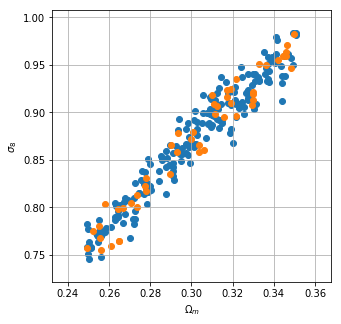

In [8]:
fig = plt.figure(figsize = (5,5))
plt.grid();
plt.scatter(all_Ys[:200, 0], all_Ys[:200, 1])
plt.scatter(all_Ys[200:, 0], all_Ys[200:, 1])

plt.ylabel(r'$\sigma_8$')
plt.xlabel(r'$\Omega_m$')
plt.show();

In [4]:
X.shape

(64, 64, 64, 64, 1)

In [5]:
np.unique(X)

array([   0,    1,    2, ..., 5759, 5768, 5793])

In [7]:
from matplotlib.colors import LogNorm

In [8]:
X[X==0] = 1+1e-6

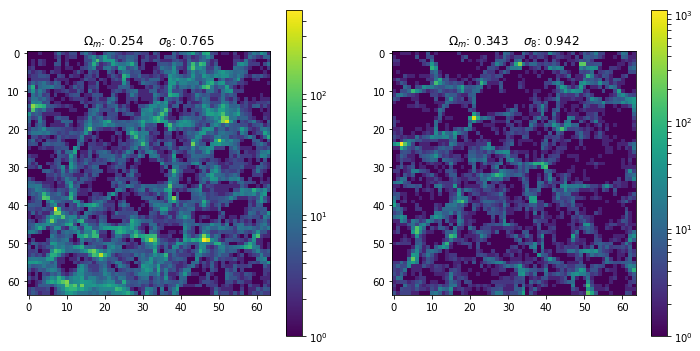

In [9]:
fig = plt.figure(figsize = (12, 6))

plt.subplot(121)
boxno = 0
X = np.array(f['Box%03d'%boxno]["X"])
X[X==0] = 1+1e-6
Y = f['Box%03d'%boxno]['Y']
im = plt.imshow(X[0, 0, :, :, 0], norm=LogNorm())
plt.colorbar(im)
plt.title(r"$\Omega_m$: %0.3f    $\sigma_8$: %0.3f"%(Y[0][0], Y[0][1]))
plt.subplot(122)
boxno = 1
X = np.array(f['Box%03d'%boxno]["X"])
X[X==0] = 1+1e-6
Y = f['Box%03d'%boxno]['Y']
im = plt.imshow(X[0, 10, :, :, 0], norm=LogNorm())
plt.colorbar(im)
plt.title(r"$\Omega_m$: %0.3f    $\sigma_8$: %0.3f"%(Y[0][0], Y[0][1]))


plt.show()

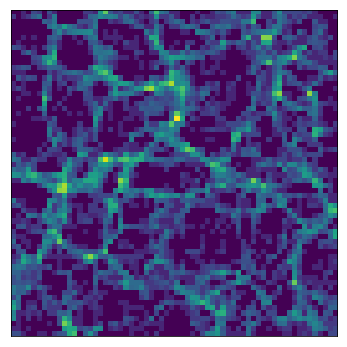

In [12]:
fig = plt.figure(figsize = (6,6))
i = 38
im = plt.imshow(X[0, i, :, :, 0], norm=LogNorm())
#plt.colorbar(im)
#plt.title(r"$\Omega_m$: %0.3f    $\sigma_8$: %0.3f"%(Y[0][0], Y[0][1]))
plt.xticks([])
plt.yticks([])
plt.show()

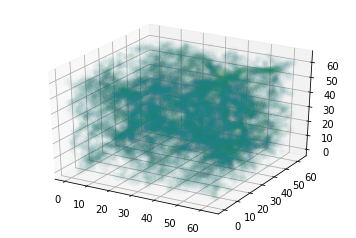

In [187]:
plt_X = X[0, :, :, :, 0]
plt_X[plt_X.mean()> plt_X] = 0

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib


minima = np.min(plt_X)+1e-1
maxima = np.max(plt_X)

norm = matplotlib.colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('viridis'))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = np.nonzero(plt_X)
ax.scatter(xs, ys, zs, c=mapper.to_rgba(plt_X[xs, ys, zs]), alpha = 0.01, norm = norm)


plt.show()

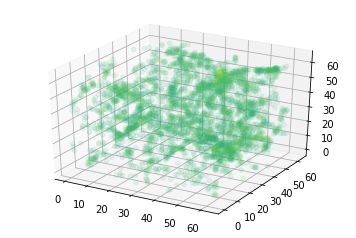

In [188]:
plt_X = X[0, :, :, :, 0]
plt_X[plt_X.mean()*10> plt_X] = 0

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib


minima = np.min(plt_X)+1e-1
maxima = np.max(plt_X)

norm = matplotlib.colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('viridis'))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = np.nonzero(plt_X)
ax.scatter(xs, ys, zs, c=mapper.to_rgba(plt_X[xs, ys, zs]), alpha = 0.1, norm = norm)


plt.show()

In [189]:
minima, maxima

(0.1, 3460)

In [191]:
all_Ys = np.array(all_Ys)

In [193]:
import seaborn as sns
sns.PairGrid(all_Ys[:, 0], all_Ys[:, 1])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices